In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [5]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [6]:
dataset = pd.read_csv('/kaggle/input/risk-score/new_ds.csv')
dataset.head()

,Unnamed: 0,is_fraud,address_verific,date_verific,email_verific,risk_score
0,0,0,3,1,1,5
1,1,0,1,2,1,4
2,2,0,2,1,1,4
3,3,0,3,1,1,5
4,4,0,1,1,1,3


In [7]:
x = dataset.drop('is_fraud', axis = 1)
y = dataset['is_fraud']

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
print('Train Size = {} \nTest Size = {} \nTotal Size = {}'.format(x_train.shape[0],x_test.shape[0],x.shape[0]))


Train Size = 93364 
Test Size = 23341 
Total Size = 116705


In [9]:
# 7.3. Using SMOTE to balance the data

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
import plotly.express as px

sm = SMOTE(random_state = 2)
x_new, y_new = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_new.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_new.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_new == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_new == 0)))

Before OverSampling, counts of label '1': 9642
Before OverSampling, counts of label '0': 83722 

After OverSampling, the shape of train_X: (167444, 5)
After OverSampling, the shape of train_y: (167444,) 

After OverSampling, counts of label '1': 83722
After OverSampling, counts of label '0': 83722


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor

model_1= KNeighborsClassifier()
model_2 = LogisticRegression()
model_3 = XGBClassifier()

# model_4 = GradientBoostingClassifier(learning_rate=0.1)


model_1.fit(x_new, y_new)
model_2.fit(x_new, y_new)
model_3.fit(x_new, y_new)

# model_6.fit(x_new, y_new)


pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)

pred_11 = model_1.predict(x_new)
pred_22 = model_2.predict(x_new)
pred_33 = model_3.predict(x_new)

# pred_6 = model_6.predict(x_test)

acc_1 = accuracy_score(y_test, pred_1) 
acc_2 = accuracy_score(y_test, pred_2) 
acc_3 = accuracy_score(y_test, pred_3) 

acc_11 = accuracy_score(y_new, pred_11) 
acc_22 = accuracy_score(y_new, pred_22) 
acc_33 = accuracy_score(y_new, pred_33) 


# acc_4 = metrics.accuracy_score(y_test, pred_6) 


print('accuracy score of KNeighbors Classifier is:', acc_1 * 100)
print('accuracy score of LR is:', acc_2 * 100)
print('accuracy score of XGB Classifier is:', acc_3 * 100)

accuracy score of KNeighbors Classifier is: 79.41819116575982
accuracy score of LR is: 57.10123816460306
accuracy score of XGB Classifier is: 100.0


Basic ensemble methods
1. Averaging method:

In [36]:
pred_final_1 = (pred_1+pred_2+pred_3)/3.0
pred_final_11 = (pred_11+pred_22+pred_33)/3.0

# printing the mean squared error between real value and predicted value

l1=log_loss(y_test, pred_final_1)

print(l1)

0.2824486594461742


In [38]:
p_pred = pred_final_1.flatten()
y_pred = np.where(p_pred > 0.5, 1, 0)

p_pred11 = pred_final_11.flatten()
y_pred22 = np.where(p_pred11 > 0.5, 1, 0)

In [39]:
    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_new, y_pred22, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_new, y_pred22)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_new, y_pred22):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

TRAINING RESULTS: 
CONFUSION MATRIX:
[[80569  3153]
 [  794 82928]]
ACCURACY SCORE:
0.9764
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.990241      0.963372  0.976428       0.976806       0.976806
recall         0.962340      0.990516  0.976428       0.976428       0.976428
f1-score       0.976091      0.976755  0.976428       0.976423       0.976423
support    83722.000000  83722.000000  0.976428  167444.000000  167444.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[19134  1948]
 [   85  2174]]
ACCURACY SCORE:
0.9129
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995577     0.527414    0.9129      0.761496      0.950267
recall         0.907599     0.962373    0.9129      0.934986      0.912900
f1-score       0.949555     0.681398    0.9129      0.815476      0.923602
support    21082.000000  2259.000000    0.9129  23341.000000  23341.000000


In [43]:
scores['Averaging'] = {
        'Train': metrics.accuracy_score(y_new, y_pred22),
        'Test': metrics.accuracy_score(y_test,y_pred),
    }

2. Max voting

In [18]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

final_model = VotingClassifier(estimators=[('knn', model_1), ('lr', model_2), ('xgb', model_3)], voting='hard')

final_model.fit(x_new, y_new)


pred_final_2 = final_model.predict(x_test)


l2=log_loss(y_test, pred_final_2)

print(l2)

3.0083925293109743


In [19]:
evaluate(final_model, x_new, x_test, y_new, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[80569  3153]
 [  794 82928]]
ACCURACY SCORE:
0.9764
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.990241      0.963372  0.976428       0.976806       0.976806
recall         0.962340      0.990516  0.976428       0.976428       0.976428
f1-score       0.976091      0.976755  0.976428       0.976423       0.976423
support    83722.000000  83722.000000  0.976428  167444.000000  167444.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[19134  1948]
 [   85  2174]]
ACCURACY SCORE:
0.9129
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.995577     0.527414    0.9129      0.761496      0.950267
recall         0.907599     0.962373    0.9129      0.934986      0.912900
f1-score       0.949555     0.681398    0.9129      0.815476      0.923602
support    21082.000000  2259.000000    0.9129  23341.000000  23341.000000


In [20]:
scores={}
scores['Max voting'] = {
        'Train': accuracy_score(y_new, final_model.predict(x_new)),
        'Test': accuracy_score(y_test, final_model.predict(x_test)),
    }

Advanced ensemble methods
1. Stacking: - not working

In [21]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

lr = LogisticRegression() # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[model_1,model_3], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)
model_stack = clf_stack.fit(x_new, y_new) # training of stacked model
pred_stack = model_stack.predict(x_test)	 # predictions on test data using stacked model
acc_stack = accuracy_score(y_test, pred_stack) # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)
# printing the mean squared error between real value and predicted value

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy score of Stacked model: 100.0


In [22]:
l3=log_loss(y_test, pred_stack)

print(l3)

9.992007221626413e-16


In [23]:
evaluate(model_stack, x_new, x_test, y_new, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[83722     0]
 [    0 83722]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    83722.0  83722.0       1.0   167444.0      167444.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[21082     0]
 [    0  2259]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    21082.0  2259.0       1.0    23341.0       23341.0


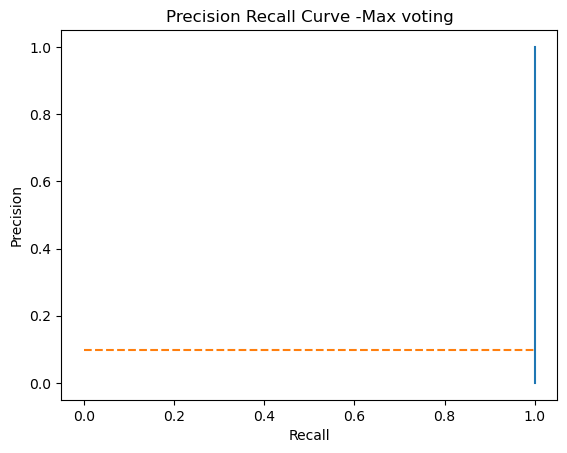

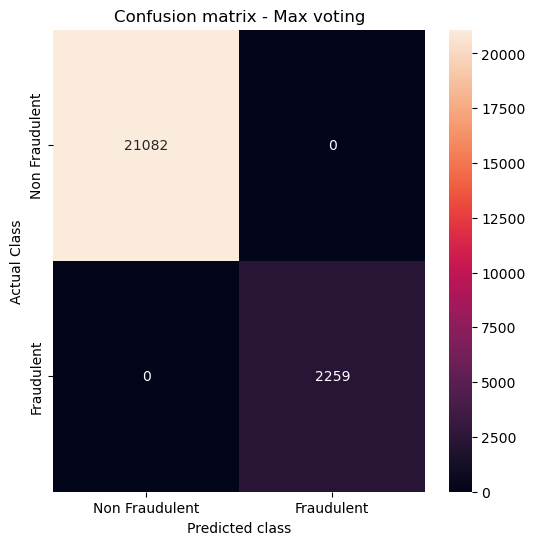

In [24]:
p, r, t = precision_recall_curve(y_test, pred_stack)
plt.plot(p, r)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve -Max voting')

confusionMatrix = confusion_matrix(y_test,  pred_stack) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Max voting") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

In [25]:
scores['Stacking'] = {
        'Train': accuracy_score(y_new, model_stack.predict(x_new)),
        'Test': accuracy_score(y_test, model_stack.predict(x_test)),
    }

Bagging

In [26]:
# importing bagging module
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# initializing the bagging model using XGboost as base model with default parameters
# model = BaggingRegressor(base_estimator=xgb.XGBRegressor())
# model = BaggingClassifier(n_estimators = 12, random_state = 22)
model = BaggingClassifier(
base_estimator=KNeighborsClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

model.fit(x_new,y_new)



BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [27]:
evaluate(model, x_new, x_test, y_new, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[75122  8600]
 [ 8176 75546]]
ACCURACY SCORE:
0.8998
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.901846      0.897797  0.899811       0.899822       0.899822
recall         0.897279      0.902343  0.899811       0.899811       0.899811
f1-score       0.899557      0.900064  0.899811       0.899811       0.899811
support    83722.000000  83722.000000  0.899811  167444.000000  167444.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[16548  4534]
 [ 1017  1242]]
ACCURACY SCORE:
0.7622
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.942101     0.215028  0.762178      0.578564      0.871733
recall         0.784935     0.549801  0.762178      0.667368      0.762178
f1-score       0.856367     0.309147  0.762178      0.582757      0.803405
support    21082.000000  2259.000000  0.762178  23341.000000  23341.000000


In [28]:
pred_final_3 = model.predict(x_test)
l4=log_loss(y_test, pred_final_3 )

print(l4)

8.214231315834699


In [29]:
scores['Bagging'] = {
        'Train': accuracy_score(y_new, model.predict(x_new)),
        'Test': accuracy_score(y_test, model.predict(x_test)),
    }

4. Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=40, learning_rate=0.2, max_features=1, max_depth=4, random_state=0)
grad_boost_clf.fit(x_new, y_new)

pred_final_4 = grad_boost_clf.predict(x_test)


l5=log_loss(y_test, pred_final_4)
print(l5)

9.992007221626413e-16


In [31]:
evaluate(grad_boost_clf, x_new, x_test, y_new, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[83722     0]
 [    0 83722]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    83722.0  83722.0       1.0   167444.0      167444.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[21082     0]
 [    0  2259]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    21082.0  2259.0       1.0    23341.0       23341.0


If the value of mean squared error(MSE) is higher, the predicted values are away from the actual values. So less MSE is required while predicting.

<AxesSubplot:>

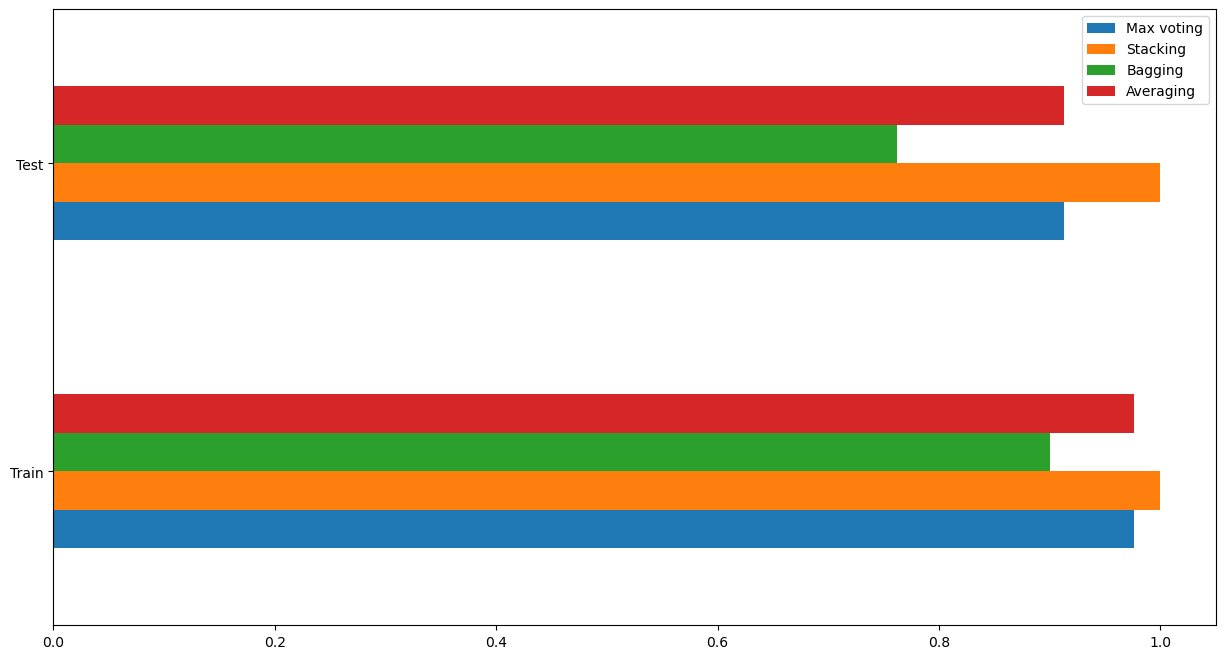

In [45]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [48]:
score = [l1,l2,l3,l4]
Models = pd.DataFrame({
    'ensemble-methods': ["Averaging","Max Voting","Stacking", "Bagging"],
    'log-loss': score})
Models.sort_values(by='log-loss', ascending=True)

,ensemble-methods,log-loss
2,Stacking,9.992007e-16
0,Averaging,2.824487e-01
1,Max Voting,3.008393e+00
3,Bagging,8.214231e+00
